In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('seaborn')
from sklearn import metrics

In [2]:
df = pd.read_csv("diamonds-1.csv", index_col = 0)
df.head(20) 

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
df.shape #wanting to see the size of the Data Frame

(53940, 10)

In [4]:
df.rename(columns = {"x": "Length_mm", "y": "Width_mm", "z": "Depth_mm" }, inplace = True) 
df.head()       #renaming the columns x,y,z into their respective value descriptions

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.columns #wanted to see the new columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'Length_mm', 'Width_mm', 'Depth_mm'],
      dtype='object')

In [6]:
df["Ratio"] = df.Length_mm / df.Width_mm
df.head()   #created the new ratio column to know that if it's closer to 1 then it's more perfectly round

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm,Ratio
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


/Users/jasonjoseph/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jasonjoseph/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


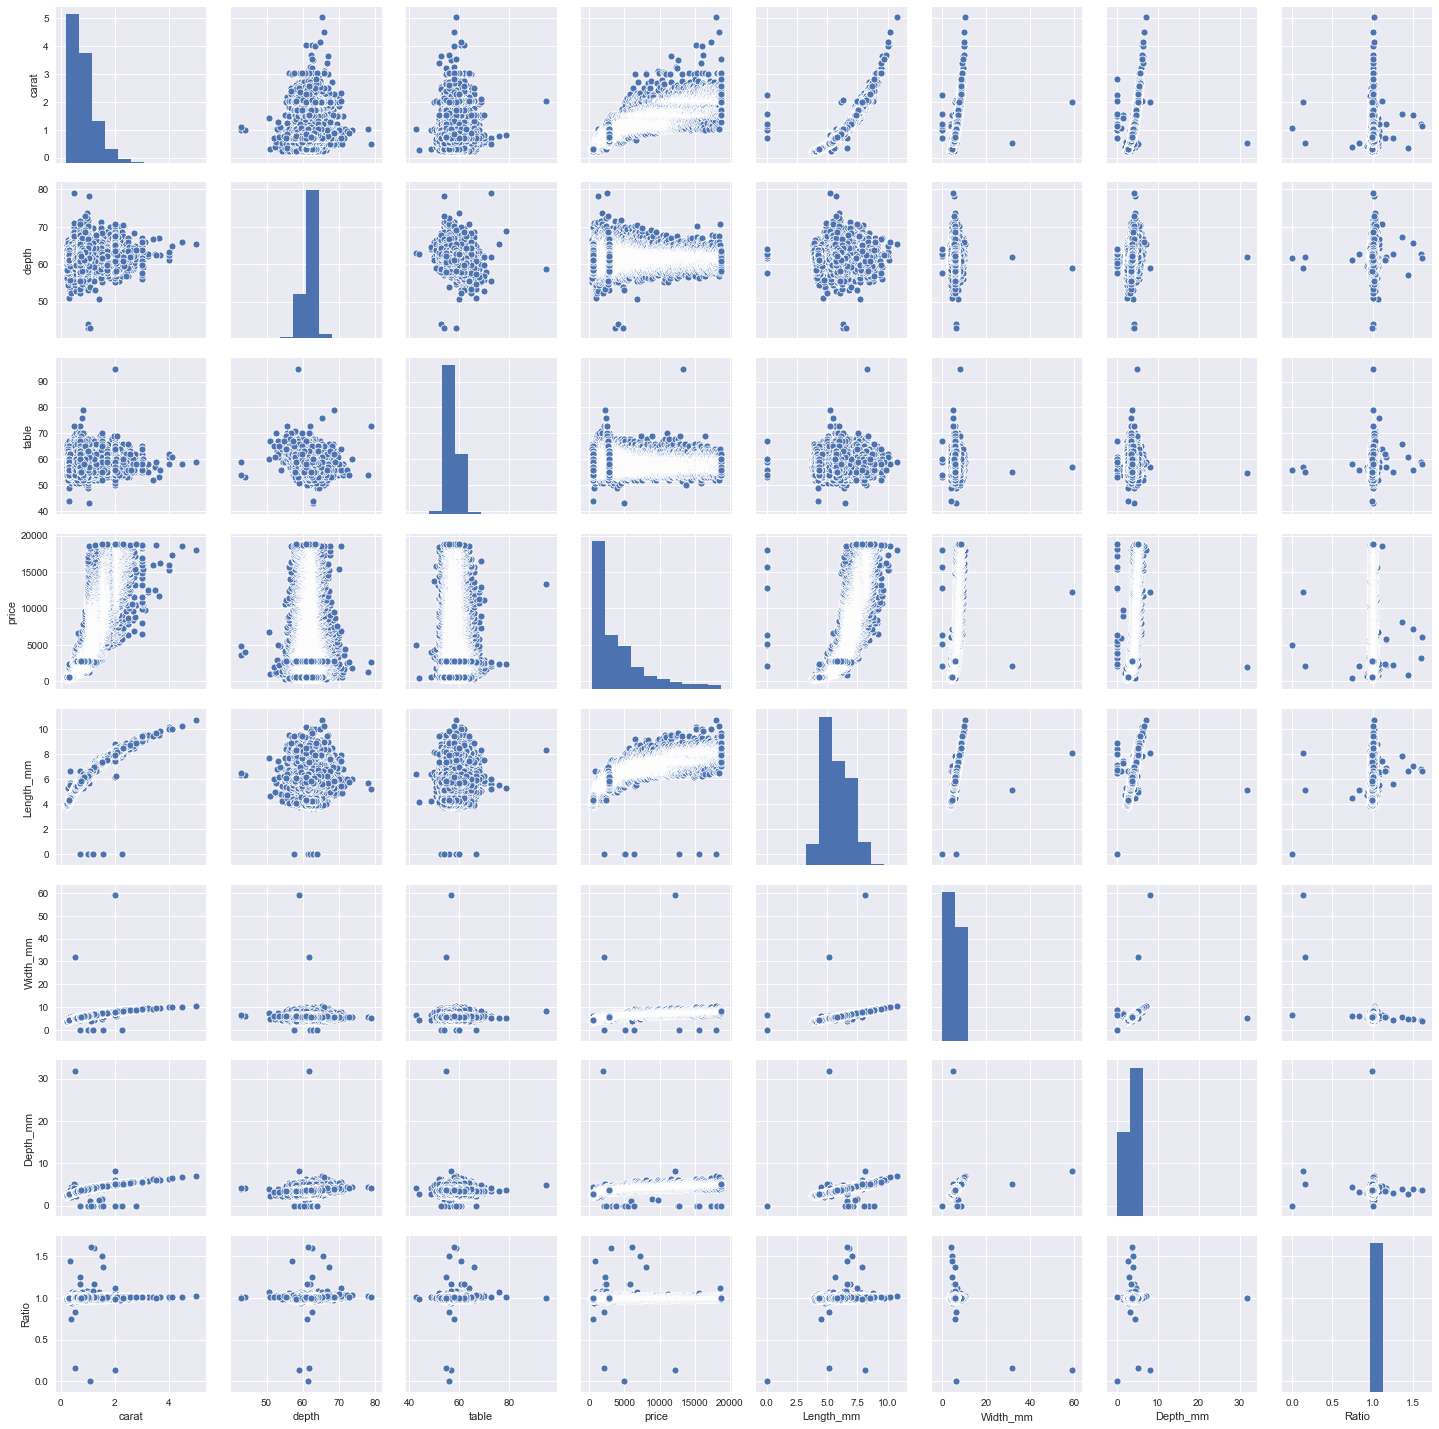

In [7]:
sns.pairplot(df)  #checking to see the different correlations prior to changing the categorical values to ordinal ones

In [8]:
df.color.value_counts() #checked to see all the different values for color column

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df.color

1        E
2        E
3        E
4        I
5        J
        ..
53936    D
53937    D
53938    D
53939    H
53940    D
Name: color, Length: 53940, dtype: object

In [10]:
# J I H G F E D

In [11]:
df["color"].replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}, inplace = True)
#changed categorical values into ordinal

In [12]:
df.head(30)

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm,Ratio
1,0.23,Ideal,6,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
2,0.21,Premium,6,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
3,0.23,Good,6,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
4,0.29,Premium,2,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
5,0.31,Good,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701
6,0.24,Very Good,1,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.994949
7,0.24,Very Good,2,VVS1,62.3,57.0,336,3.95,3.98,2.47,0.992462
8,0.26,Very Good,3,SI1,61.9,55.0,337,4.07,4.11,2.53,0.990268
9,0.22,Fair,6,VS2,65.1,61.0,337,3.87,3.78,2.49,1.023810
10,0.23,Very Good,3,VS1,59.4,61.0,338,4.00,4.05,2.39,0.987654


In [13]:
#  (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [14]:
df["clarity"].replace({"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}, inplace = True)
#changed categorical values into ordinal

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm,Ratio
1,0.23,Ideal,6,2,61.5,55.0,326,3.95,3.98,2.43,0.992462
2,0.21,Premium,6,3,59.8,61.0,326,3.89,3.84,2.31,1.013021
3,0.23,Good,6,5,56.9,65.0,327,4.05,4.07,2.31,0.995086
4,0.29,Premium,2,4,62.4,58.0,334,4.20,4.23,2.63,0.992908
5,0.31,Good,1,2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [16]:
df.clarity.value_counts()  #checked to see all the different values for clarity column

3    13065
4    12258
2     9194
5     8171
6     5066
7     3655
8     1790
1      741
Name: clarity, dtype: int64

In [17]:
df.cut.value_counts()  #checked to see all the different values for cut column

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
# (Fair, Good, Very Good, Premium, Ideal)

In [19]:
df["cut"].replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}, inplace = True)
#changed categorical values into ordinal

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm,Ratio
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,0.992462
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,1.013021
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,0.995086
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,0.992908
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [21]:
df.describe() #checked to see different statistical measures of the data gathered

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm,Ratio
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


In [105]:
df.isnull().sum() #checking to see if there were any null values

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
Length_mm    0
Width_mm     0
Depth_mm     0
dtype: int64

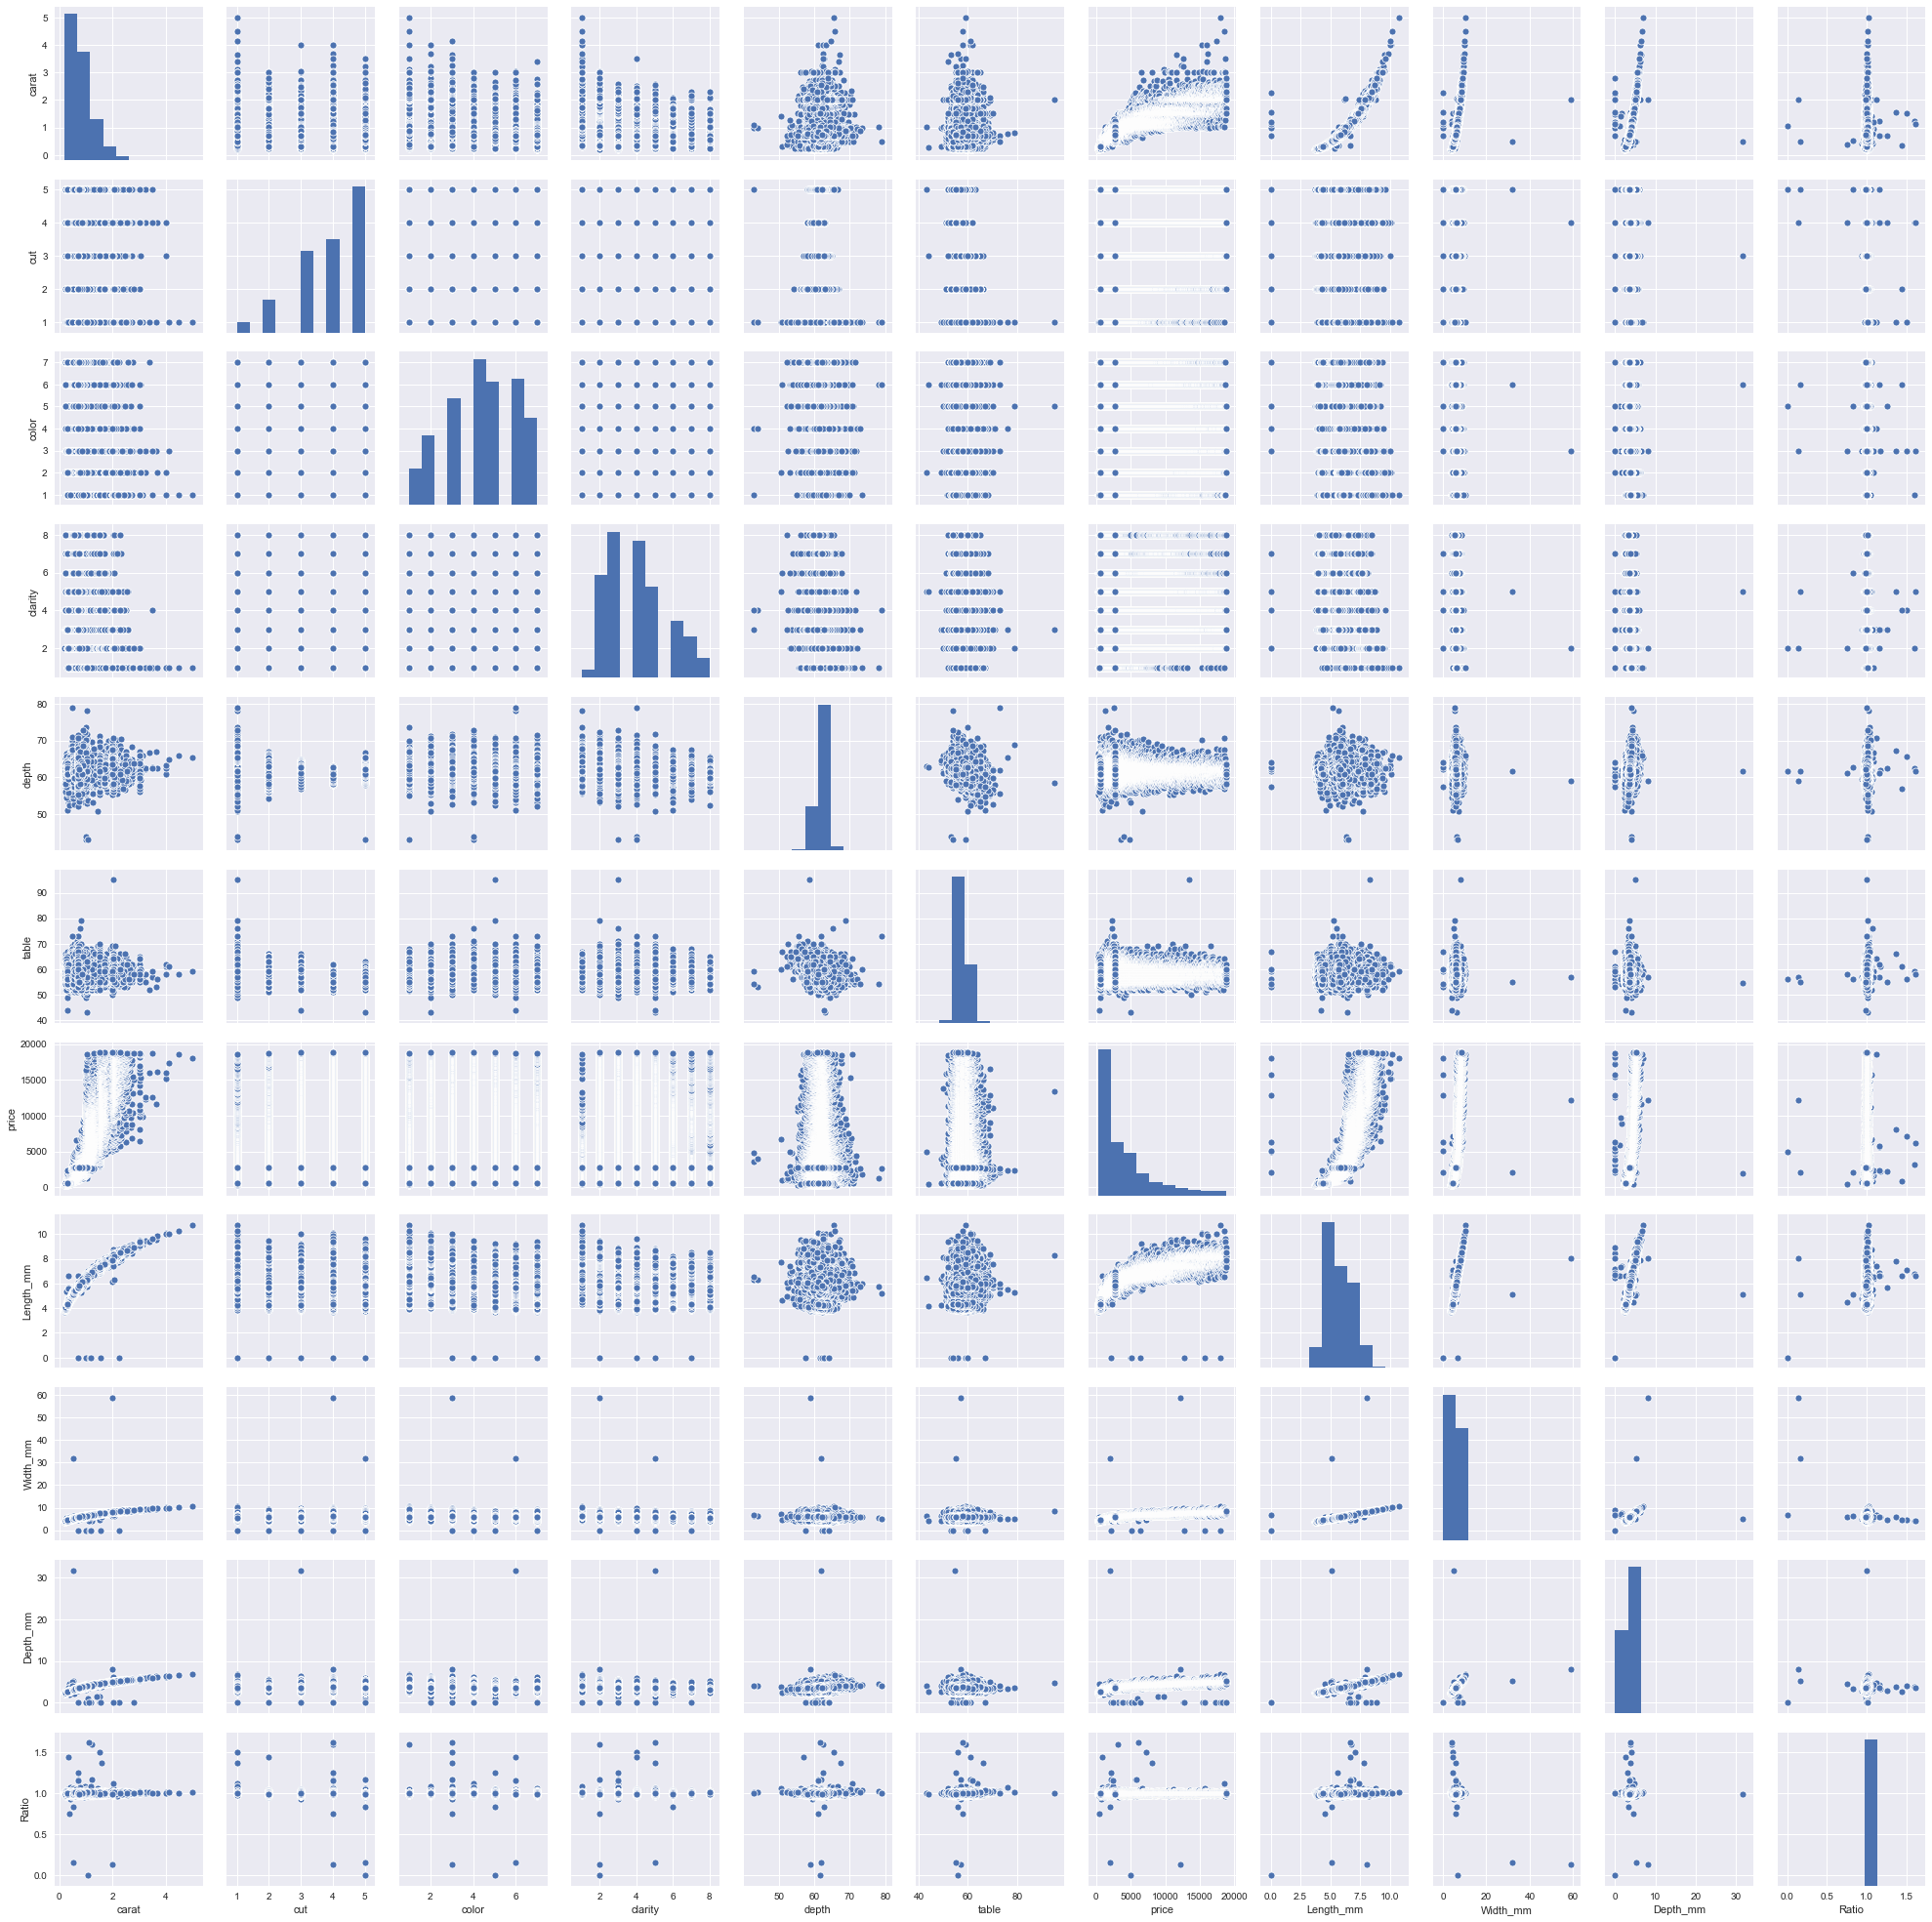

In [23]:
sns.pairplot(df)  #seeing the different correlations after changing all the categorical values into ordinal ones

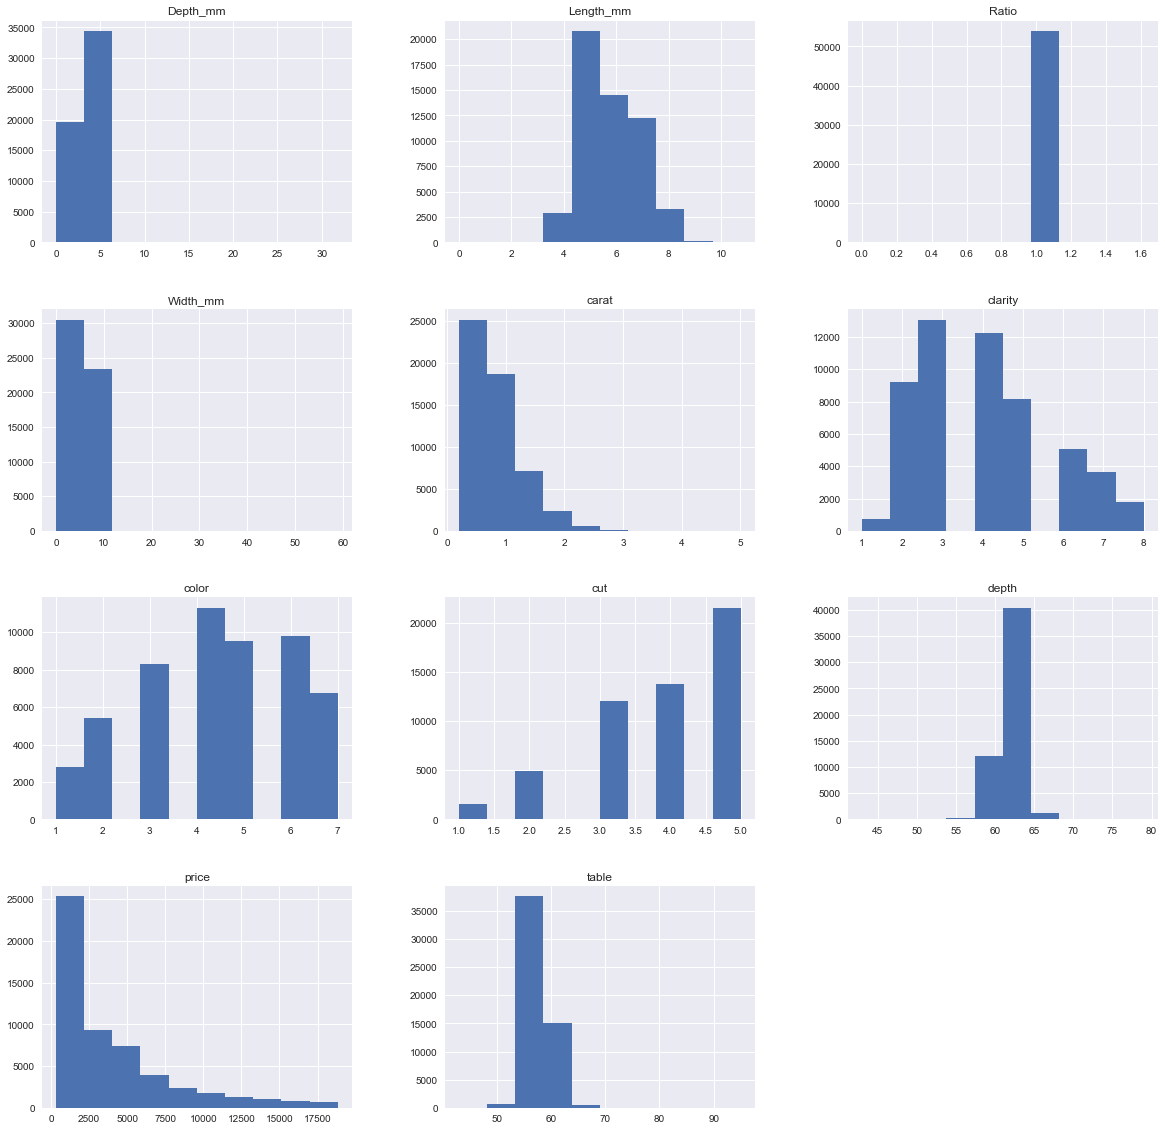

In [24]:
df.hist(figsize=(20, 20))
plt.show()   #plotting histograms of the data

What is the Distribution of Price ?

Text(0.5, 1.0, 'Diamonds')

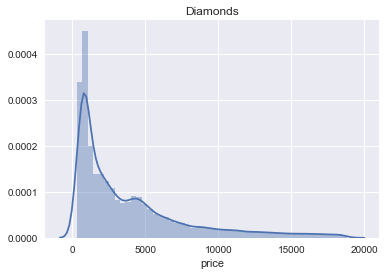

In [152]:
sns.distplot(df.price).set_title('Diamonds')  #checked to see the skewness of target variable of price

Text(0.5, 1.0, 'Diamonds')

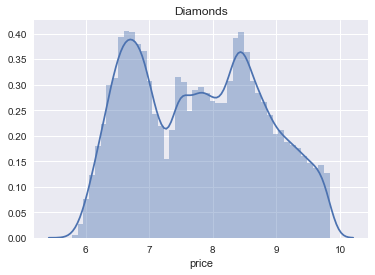

In [153]:
sns.distplot(np.log(df.price)).set_title('Diamonds')  #wanted to un-skew the data so I took the log of price

In [27]:
# much more lower quality diamonds causing big quantity of cheaper priced diamonds

Text(0.5, 1.0, 'Diamonds')

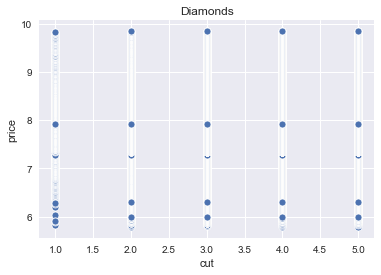

In [170]:
sns.scatterplot(df.cut, np.log(df.price)).set_title('Diamonds')  #scatter plot of price & cut

Text(0.5, 1.0, 'Diamonds')

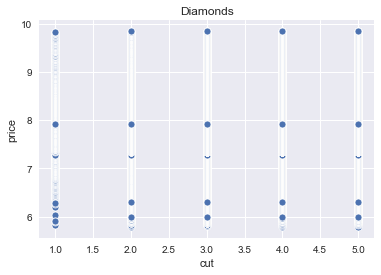

In [169]:
sns.scatterplot(df.cut, np.log(df.price)).set_title('Diamonds')
#logged the price to make it to a smaller scale and easier to interpret graph

Text(0.5, 1, 'Diamonds')

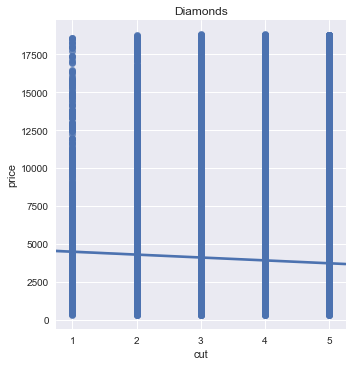

In [151]:
sns.lmplot(y = "price", x = "cut", data = df, fit_reg = True)  #Linear Model plot to view correlation
plt.title("Diamonds")

Are Price & Cut Correlated ?

Text(0.5, 1.0, 'Diamonds')

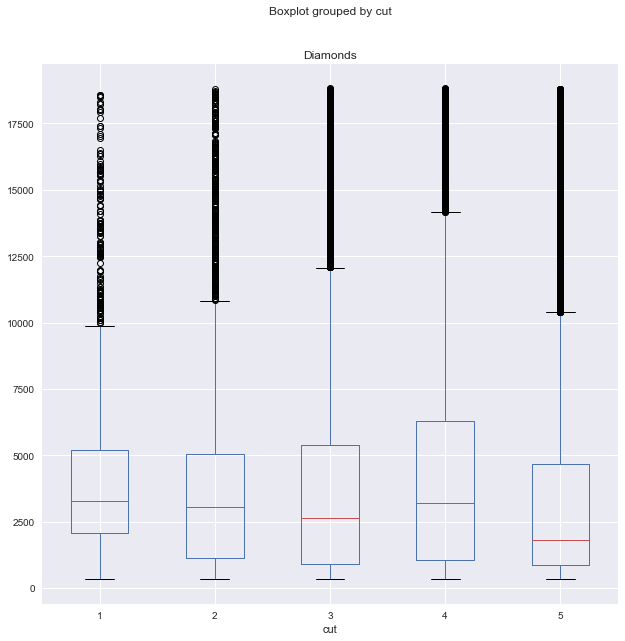

In [163]:
df.boxplot("price", "cut", figsize = (10,10)).set_title('Diamonds')

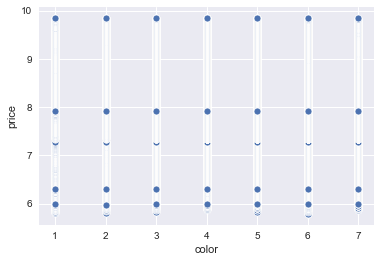

In [168]:
sns.scatterplot(df.color, np.log(df.price))  #scatter plot of price & color 

Text(0.5, 1, 'Diamonds')

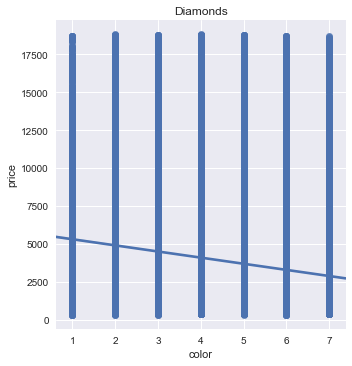

In [150]:
sns.lmplot(y = "price", x = "color", data = df, fit_reg = True)   #Linear Model plot to view correlation
plt.title("Diamonds")

Are Price & Color Correlated ?

Text(0.5, 1.0, 'Diamonds')

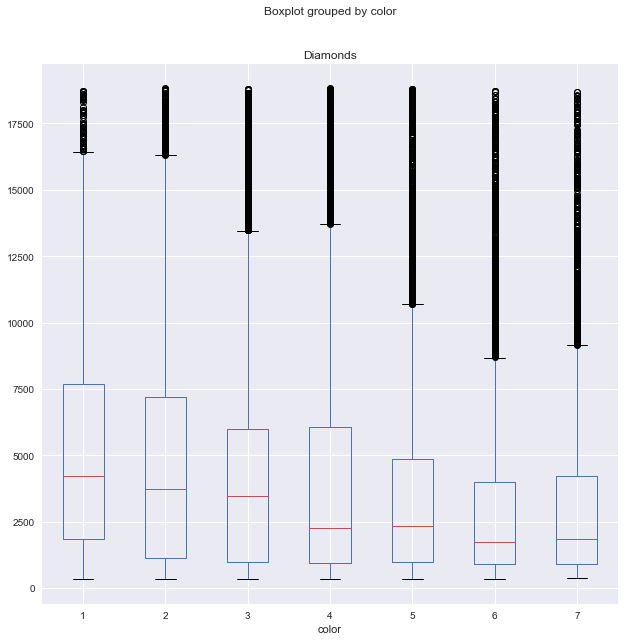

In [164]:
df.boxplot("price", "color", figsize = (10,10)).set_title('Diamonds') 

In [ ]:
# the higher grade in color the more evenly distributed the outliers are which mean higher prices so more rare

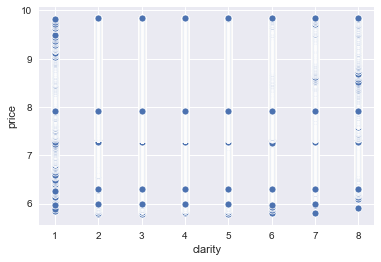

In [167]:
sns.scatterplot(df.clarity, np.log(df.price))  #scatter plot of price & clarity

Text(0.5, 1, 'Diamonds')

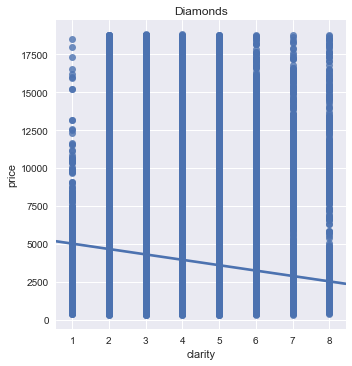

In [149]:
sns.lmplot(y = "price", x = "clarity", data = df, fit_reg = True)   #Linear Model plot to view correlation
plt.title("Diamonds")

Are Price & Clarity Correlated ?

Text(0.5, 1.0, 'Diamonds')

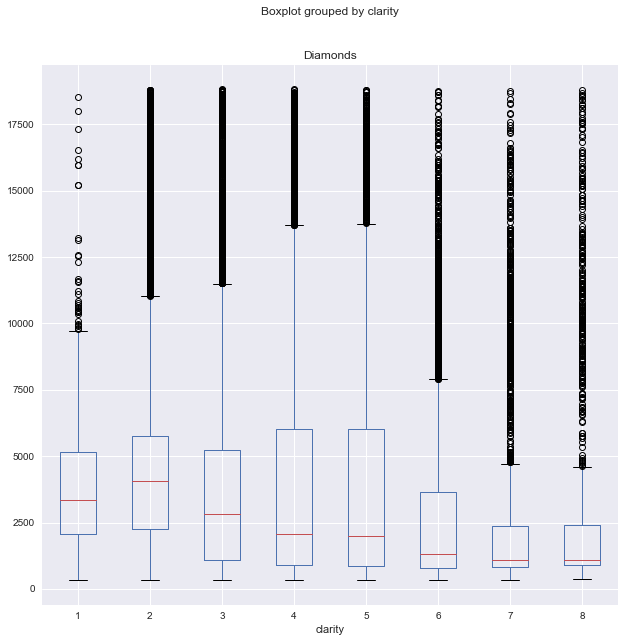

In [165]:
df.boxplot("price", "clarity", figsize = (10,10)).set_title('Diamonds') 

Text(0.5, 1.0, 'Diamonds')

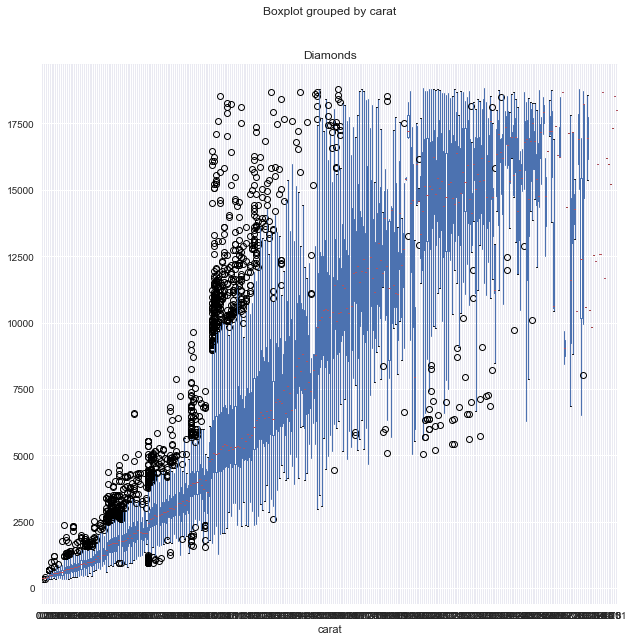

In [172]:
df.boxplot("price", "carat", figsize = (10,10)).set_title('Diamonds')
#Didn't get significant results from graph because carat is a continuous variable

Are Price & Carat Weight Correlated ?

Text(0.5, 1.0, 'Diamonds')

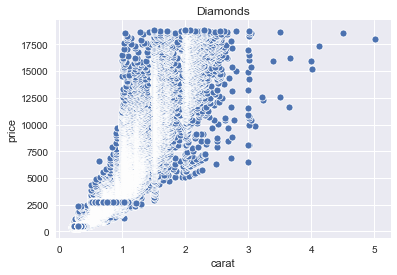

In [179]:
sns.scatterplot(df.carat, df.price).set_title('Diamonds')  #scatter plot of price & carat

Text(0.5, 1, 'Diamonds')

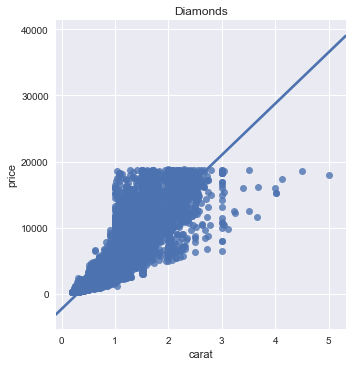

In [148]:
sns.lmplot(y = "price", x = "carat", data = df, fit_reg = True)  #Linear Model plot to view correlation
plt.title("Diamonds")

Heat Map of the Data Set

In [197]:
corr

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
Length_mm,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
Width_mm,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
Depth_mm,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


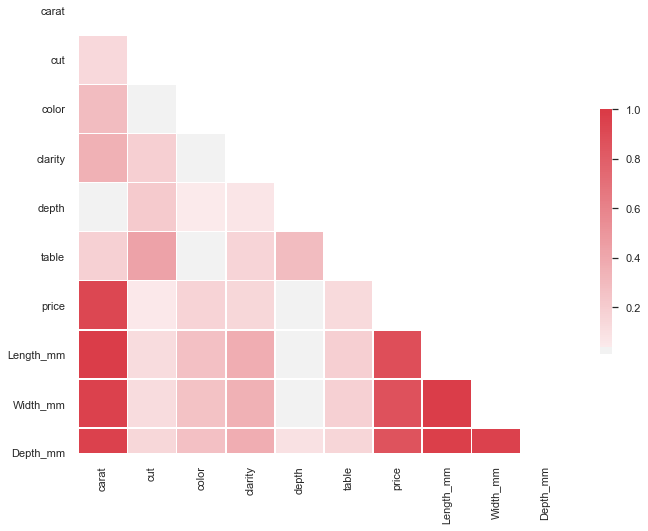

In [211]:
sns.set(style="white")
# Compute the correlation matrix
corr = np.abs(hi.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [40]:
df_corr_matrix = df.corr() 
df_corr_matrix  #computed a correlation matrix for data set to see if it suggested that any features were collinear

,carat,cut,color,clarity,depth,table,price,Length_mm,Width_mm,Depth_mm,Ratio
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.118238
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,-0.024523
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,-0.031592
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952,-0.126955
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.049873
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.121812
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.074599
Length_mm,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.141480
Width_mm,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.001633
Depth_mm,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.112408


In [185]:
mlr_model = ols(formula = "price ~ carat + cut + color + clarity", data = df).fit()  #Without scaling the numbers
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.272e+05
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        02:45:25   Log-Likelihood:            -4.6053e+05
No. Observations:               53940   AIC:                         9.211e+05
Df Residuals:                   53935   BIC:                         9.211e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7218.5545     33.296   -216.799      0.000   -7283.815   -7153.294
carat       8783.7718     12.692    692.087      0.000    8758.896    8808.648
cut          155.6999      4.863     32.014      0.000     146.167     165.232
color        319.6727      3.302     96.808      0.000     313.200     326.145
clarity      524.8435      3.527    148.799      0.000     517.930     531.757
==============================================================================
Omnibus:                    10789.064   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251931.502
Skew:                           0.366   Prob(JB):                         0.00
Kurtosis:                      13.562   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Scaling the Model so the features are represented in standard deviations as opposed to it's normal numbers
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = list(df.columns)

In [50]:
mlr_model = ols(formula = "price ~ carat + cut + color + clarity", data = df_scaled).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.272e+05
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        16:57:57   Log-Likelihood:                -13288.
No. Observations:               53940   AIC:                         2.659e+04
Df Residuals:                   53935   BIC:                         2.663e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.359e-16      0.001  -1.77e-13      1.000      -0.003       0.003
carat          1.0437      0.002    692.087      0.000       1.041       1.047
cut            0.0436      0.001     32.014      0.000       0.041       0.046
color          0.1363      0.001     96.808      0.000       0.134       0.139
clarity        0.2167      0.001    148.799      0.000       0.214       0.220
==============================================================================
Omnibus:                    10789.064   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251931.502
Skew:                           0.366   Prob(JB):                         0.00
Kurtosis:                      13.562   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
target = df_scaled.price
features = df_scaled.drop(["price", "Ratio"], axis = 1) #dropped Ratio in addition because I realized it wasn't as useful

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, test_size = 0.2, random_state = 15)

In [54]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'Length_mm',
       'Width_mm', 'Depth_mm'],
      dtype='object')

In [62]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, normalize = False)

lasso = lasso.fit(X_train, (y_train))

y_train_pred = lasso.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, (y_train_pred))  #getting the mean absolute error
train_mse = metrics.mean_squared_error(y_train, (y_train_pred))   #getting the mean squared error
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, (y_train_pred)))  #getting the root mean squared error

In [63]:
print(train_mae)
print(train_mse)
print(train_rmse)

0.21042431537527861
0.09559166947418488
0.309179024958332


In [66]:
print ("R^2 Score:", lasso.score(X_train, (y_train)))  #getting the R^2 value

R^2 Score: 0.9042486341262427


In [65]:
y_pred = lasso.predict(X_test)

In [75]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_mse = (metrics.mean_squared_error(y_test, y_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [212]:
print(test_mae)
print(test_mse)
print(test_rmse)

0.12948847379656558
2.0430209538550668
1.4293428398586068


In [ ]:
sdd = test_rmse / y_test.std()  #shows how many standard deviations the average error is away from the true value
sdd

In [69]:
## training the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm = lm.fit(X_train, (y_train))


y_train_pred = lm.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, (y_train_pred))  #getting the mean absolute error
train_mse = metrics.mean_squared_error(y_train, (y_train_pred))   #getting the mean squared error
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, (y_train_pred)))  #getting the roort mean squared error

In [70]:
print(train_mae)
print(train_mse)
print(train_rmse)

0.20123486730377438
0.09209373418844573
0.3034694946587642


In [116]:
print ("R^2 Score:", lm.score(X_train, (y_train)))  #getting the R^2 value

R^2 Score: 0.9077524130976726


In [117]:
y_pred = lm.predict(X_test)

In [118]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_mse = (metrics.mean_squared_error(y_test, y_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [119]:
print(test_mae)
print(test_mse)
print(test_rmse)

0.20438958057244488
0.09709165628967366
0.3115953406096979


In [187]:
sd = test_rmse / y_test.std()  #shows how many standard deviations the average error is away from the true value
sd

0.31054980576001195

In [77]:
lm.coef_ #wanted to see the different coefficients from my features 

array([ 1.27718005,  0.03467103,  0.1375983 ,  0.20645464, -0.02883154,
       -0.01433144, -0.29421679,  0.05709798, -0.00200008])

In [114]:
df2 = df.drop(["price", "Ratio"], axis = 1)  #creating a new Data Frame without my target or the column I created
df2.head()

,carat,cut,color,clarity,depth,table,Length_mm,Width_mm,Depth_mm
1,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75


In [198]:
#creating new polynomial features

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(df2)

polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit(df2)
x_poly_df = pd.DataFrame(x_poly.transform(df2),columns = x_poly.get_feature_names(df2.columns))

In [202]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_poly_df, target, train_size = 0.8, test_size = 0.2, random_state = 15)

In [203]:
from sklearn.linear_model import LinearRegression

lm_poly = LinearRegression()

lm_poly = lm.fit(X_train2, (y_train2))


y_train_p = lm_poly.predict(X_train2)
y_test_p = lm_poly.predict(X_test2)

train_mae = metrics.mean_absolute_error(y_train2, (y_train_p))  #getting the mean absolute error
train_mse = metrics.mean_squared_error(y_train2, (y_train_p))   #getting the mean squared error
train_rmse = np.sqrt(metrics.mean_squared_error(y_train2, (y_train_p)))  #getting the roort mean squared error

In [204]:
train_mae = metrics.mean_absolute_error(y_train2, (y_train_p))
train_mse = metrics.mean_squared_error(y_train2, (y_train_p))
train_rmse = np.sqrt(metrics.mean_squared_error(y_train2, (y_train_p)))

In [205]:
print(train_mae)
print(train_mse)
print(train_rmse)

0.11382011498108593
0.0356876433444278
0.1889117342687526


In [206]:
print ("R^2 Score:", lm_poly.score(X_train2, (y_train2)))

R^2 Score: 0.9642527365214887


In [207]:
test_mae = metrics.mean_absolute_error(y_test2, y_test_p)
test_mse = (metrics.mean_squared_error(y_test2, y_test_p))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_test_p))

In [208]:
print(test_mae)
print(test_mse)
print(test_rmse)

0.12948847379656558
2.0430209538550668
1.4293428398586068


In [209]:
x_poly_df.columns  #wanted to see all the new features

Index(['1', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'Length_mm',
       'Width_mm', 'Depth_mm', 'carat^2', 'carat cut', 'carat color',
       'carat clarity', 'carat depth', 'carat table', 'carat Length_mm',
       'carat Width_mm', 'carat Depth_mm', 'cut^2', 'cut color', 'cut clarity',
       'cut depth', 'cut table', 'cut Length_mm', 'cut Width_mm',
       'cut Depth_mm', 'color^2', 'color clarity', 'color depth',
       'color table', 'color Length_mm', 'color Width_mm', 'color Depth_mm',
       'clarity^2', 'clarity depth', 'clarity table', 'clarity Length_mm',
       'clarity Width_mm', 'clarity Depth_mm', 'depth^2', 'depth table',
       'depth Length_mm', 'depth Width_mm', 'depth Depth_mm', 'table^2',
       'table Length_mm', 'table Width_mm', 'table Depth_mm', 'Length_mm^2',
       'Length_mm Width_mm', 'Length_mm Depth_mm', 'Width_mm^2',
       'Width_mm Depth_mm', 'Depth_mm^2'],
      dtype='object')

In [182]:
len(x_poly_df.columns)  #wanted to see the length of all the new features

55

My approach to this project was to first find a data set of diamonds that I could work with that had enough columns(features) for me to engineer with so that I could make the best possible prediction model.  I had some prior background knowledge on diamonds and jewelry in general, however I wanted to put that to the test to see if my predictions of certain features would directly influence my target variable which was price.  I was also keeping in mind the entire time the different types of graphs I could use to help visualize my various correlations.  

The final model I decided to use to best predict the price of diamonds is my OLS Model.  My R^2 value was very similar for all four of my models however my OLS Model had the least amount of features which is ideal for a better fitting prediction model.  One feature that had a significant impact on our dependent variable of price was color of the diamond.  The coefficient for color was 0.1363 standard deviations which is a strong number.  For every grade of color that went up the price would increase by approximately 319.67 dollars.  A second feature that had a significant impact on price was clarity of the diamond.  The coefficient for clarity was 0.2167 standard deviations which is also a strong number.  For every grade of clarity that went up the price would increase by roughly 524.84 dollars.  The final and most significant feature that effected price was carat weight of the diamond.  The coefficient for carat was 1.0437 standard deviations which is the highest of the other two and all other features from this data set.  For every increase in carat weight, the price goes up by about 8,783.77 dollars.  All of these features had a P value under 0.05 which means that they are all statistically significant.  From this, we can say that we are 95 percent confident that our data is valuable the model because it effects price.